In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import trange

import actor_critic
import importlib
importlib.reload(actor_critic)
from actor_critic import ActorCritic, EnvBatch

In [2]:
environ_name = "Pendulum-v0"

env = EnvBatch( environ_name, n_envs=1 )
ac = ActorCritic(
                 env=env,
                 entropy_coef=0.01,
                 scale_model_inputs=True,
                 actor_learning_rate=0.00002,
                 critic_learning_rate=0.001
                )

In [ ]:
ac.run(n_iters=10001, gamma=0.99)

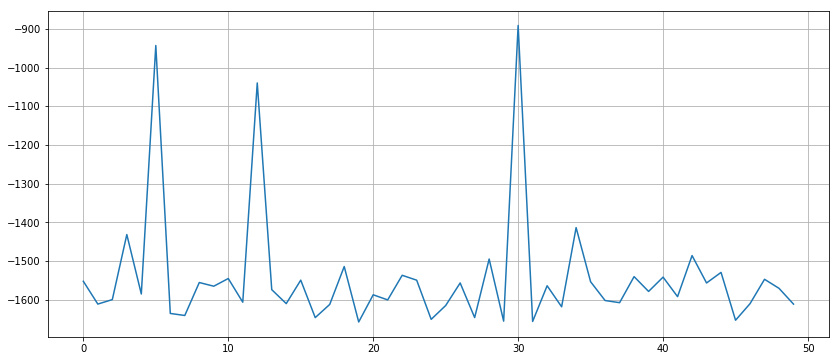

In [4]:
gamma = 0.99
n_episodes = 10000

# Get the initial states
batch_states = ac.env.reset()
rewards_mean, rewards_max, rewards_min = [], [], []
entropy_history = []        
curr_scores = np.zeros((len(batch_states),))
scores = []

for i in range(n_episodes):
    batch_actions = ac.choose_action_from_state(batch_states)
    batch_next_states, batch_rewards, batch_done, _ = ac.env.step(batch_actions)

    # Increment the scores, and reward scores for games that have finished
    curr_scores += batch_rewards
    scores.extend(curr_scores[batch_done])
    curr_scores[batch_done] = 0

    # Train the neural network from the states, rewards and transitions
    actor_loss, critic_loss, ent_t = ac.train_step( batch_states, batch_next_states, \
                                  batch_actions, batch_rewards, batch_done, gamma=gamma )
    batch_states = batch_next_states
    entropy_history.append(np.mean(ent_t))

    if np.any(batch_done):
        print( '{}: Finished with score of: {}'.format(i, scores[-1] ) )
        clear_output(True)
        plt.figure(figsize=[14, 6])
        plt.grid()
        plt.plot(scores)
        plt.show()

In [24]:
import gym
dt = list(gym.envs.registry.all())
kenv = gym.make( 'KellyCoinflip-v0')

In [31]:
kenv.observation_space[0].low[0]

0.0

In [42]:
gym.envs.classic_control

260

In [43]:
np.hstack( [ [0], np.array(3) ])

array([0, 3])

In [47]:
from collections import namedtuple
Observation = namedtuple( 'Observation', [ 'portfolio_value', 'weight', 'mu', 'cholesky' ])

In [65]:
np.tril_indices_from?

In [66]:
import tensorflow_probability as tfp

In [97]:
R = np.random.randn(1000,2) 
R = R - R.mean(axis=1, keepdims=True)

(0, 1)

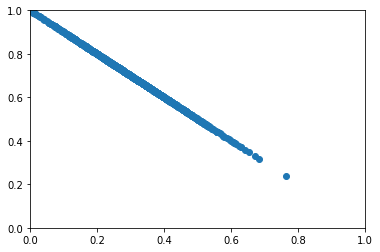

In [98]:
plt.scatter( 0.3 + 0.2 * R[:,0], 0.7 + 0.2 * R[:,1])
plt.xlim( [0,1])
plt.ylim([0, 1] )

(array([  2.,  15.,  61., 141., 234., 253., 178.,  87.,  24.,   5.]),
 array([0.43614055, 0.52511893, 0.61409731, 0.70307568, 0.79205406,
        0.88103244, 0.97001082, 1.0589892 , 1.14796757, 1.23694595,
        1.32592433]),
 <a list of 10 Patch objects>)

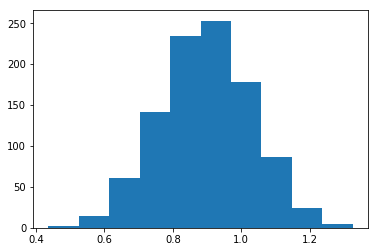

In [101]:
plt.hist(0.9 + 0.2 * R[:,1])

In [108]:
np.random.dirichlet( np.ones((4,)) )

array([0.20442988, 0.12526024, 0.15330048, 0.51700941])

In [109]:
rangen = np.random.RandomState()